Put all sample files into path -> Expression/all/ 

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF;
import matplotlib.pyplot as plt
%matplotlib inline
path="Expression/all/"
Files=os.listdir(path)

For NMF configuration

In [2]:
NumberOfComponents = 7
NumberOfTopCoefficientId = 1000

Prepare Data

In [3]:
IndexTpmList=[]
IdIndexDict={}
IdNameDict={}
idx=0
print(Files)

['BC-1.exp', 'BC-2.exp', 'BC-3.exp', 'org-19.exp', 'org-42.exp', 'Org-42N.exp', 'Org-50C.exp', 'Org-50N.exp', 'Org-52C.exp', 'Org-52N.exp', 'Org-54C.exp', 'Org-54N.exp', 'Org-59C.exp', 'Org-59N.exp', 'org-7.exp', 'RUN-CA05.exp', 'RUN-CA07.exp', 'RUN-CA08.exp', 'RUN-CA16.exp', 'RUN-CA17.exp', 'RUN-CA19.exp', 'RUN-CA20.exp', 'RUN-CA22.exp', 'RUN-CA23.exp', 'RUN-CA25.exp']


In [4]:
for NameOfFile in Files:
    df=pd.DataFrame(pd.read_csv(path+NameOfFile,sep='\t'))
    for Id,Name in zip(df['Gene ID'],df['Gene Name']):
        if Name!='-' and Id not in IdIndexDict:
            IdIndexDict[Id]=idx
            IdNameDict[Id]=Name
            idx+=1
IndexIdDict = {v: k for k, v in IdIndexDict.items()}

c:\users\kok\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
for NameOfFile in Files:
    df=pd.DataFrame(pd.read_csv(path+NameOfFile,sep='\t'))
    tmp=np.zeros(len(IdIndexDict))
    for Id,Tpm in zip(df['Gene ID'],df['TPM']):
        if Id in IdIndexDict:
            tmp[IdIndexDict[Id]]=Tpm
    IndexTpmList.append(tmp)
    del tmp
IndexTpmList=np.array(IndexTpmList)
IndexTpmList.shape

(25, 63677)

NMF Process

In [6]:
#init = ‘random’ | ‘nndsvd’ | ‘nndsvda’ | ‘nndsvdar’ | ‘custom’
model = NMF(n_components=NumberOfComponents, init='nndsvd');
model.fit(IndexTpmList)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=7, random_state=None, shuffle=False,
  solver='cd', tol=0.0001, verbose=0)

In [7]:
ComponentId=[]
H=model.components_
for component in H:
    ComponentId.append([IndexIdDict[index] for index in np.argsort(component)[-NumberOfTopCoefficientId:]])

In [8]:
ComponentIdTran=np.array(ComponentId).transpose()

In [9]:
title=['Component '+str(i) for i in range(0,NumberOfComponents)]
df = pd.DataFrame(ComponentIdTran,columns=[title])
df

Component 0      Component 1      Component 2      Component 3  \
0    ENSG00000184983  ENSG00000168765  ENSG00000117362  ENSG00000106049   
1    ENSG00000162522  ENSG00000178982  ENSG00000169976  ENSG00000148341   
2    ENSG00000112081  ENSG00000166595  ENSG00000125652  ENSG00000127824   
3    ENSG00000101150  ENSG00000179195  ENSG00000239697  ENSG00000159184   
4    ENSG00000157873  ENSG00000049449  ENSG00000145901  ENSG00000267697   
5    ENSG00000243989  ENSG00000091527  ENSG00000142192  ENSG00000188910   
6    ENSG00000066230  ENSG00000145247  ENSG00000165283  ENSG00000092199   
7    ENSG00000183048  ENSG00000161547  ENSG00000198682  ENSG00000262481   
8    ENSG00000104529  ENSG00000159692  ENSG00000172340  ENSG00000168765   
9    ENSG00000084090  ENSG00000073578  ENSG00000138821  ENSG00000227766   
10   ENSG00000068001  ENSG00000175826  ENSG00000186470  ENSG00000068745   
11   ENSG00000161671  ENSG00000113722  ENSG00000072274  ENSG00000108561   
12   ENSG00000106665  ENSG00000106003  ENSG00000130707  ENSG00000177106   
13   ENSG00000256566  ENSG00000133318  ENSG00000111237  ENSG00000161921   
14   ENSG00000205277  ENSG00000130706  ENSG00000163874  ENSG00000170348   
15   ENSG00000089280  ENSG00000176945  ENSG00000144848  ENSG00000156171   
16   ENSG00000099341  ENSG00000165556  ENSG00000211655  ENSG00000125775   
17   ENSG00000198952  ENSG00000108604  ENSG00000140497  ENSG00000182551   
18   ENSG00000176046  ENSG00000158747  ENSG00000117616  ENSG00000062716   
19   ENSG00000127838  ENSG00000115310  ENSG00000108465  ENSG00000158109   
20   ENSG00000165389  ENSG00000189159  ENSG00000131069  ENSG00000106003   
21   ENSG00000211942  ENSG00000112655  ENSG00000000971  ENSG00000175567   
22   ENSG00000084234  ENSG00000117906  ENSG00000099783  ENSG00000258818   
23   ENSG00000183723  ENSG00000110013  ENSG00000140575  ENSG00000149328   
24   ENSG00000178980  ENSG00000126709  ENSG00000168610  ENSG00000169714   
25   ENSG00000164251  ENSG00000041357  ENSG00000106588  ENSG00000215700   
26   ENSG00000143375  ENSG00000118523  ENSG00000204936  ENSG00000148908   
27   ENSG00000143819  ENSG00000184007  ENSG00000143183  ENSG00000224259   
28   ENSG00000196419  ENSG00000184363  ENSG00000002549  ENSG00000104915   
29   ENSG00000141580  ENSG00000184216  ENSG00000071082  ENSG00000117691   
..               ...              ...              ...              ...   
970  ENSG00000108298  ENSG00000100316  ENSG00000198804  ENSG00000105640   
971  ENSG00000148303  ENSG00000142534  ENSG00000239951  ENSG00000108298   
972  ENSG00000133112  ENSG00000167658  ENSG00000132465  ENSG00000198755   
973  ENSG00000225630  ENSG00000263900  ENSG00000105388  ENSG00000162244   
974  ENSG00000209082  ENSG00000137154  ENSG00000198695  ENSG00000134193   
975  ENSG00000140988  ENSG00000167996  ENSG00000198886  ENSG00000142534   
976  ENSG00000170421  ENSG00000170421  ENSG00000148346  ENSG00000138326   
977  ENSG00000233041  ENSG00000089157  ENSG00000234745  ENSG00000161970   
978  ENSG00000248527  ENSG00000254772  ENSG00000240041  ENSG00000229117   
979  ENSG00000198695  ENSG00000197958  ENSG00000210082  ENSG00000265039   
980  ENSG00000211459  ENSG00000148303  ENSG00000156508  ENSG00000142676   
981  ENSG00000211895  ENSG00000198804  ENSG00000162896  ENSG00000163586   
982  ENSG00000210127  ENSG00000142937  ENSG00000198727  ENSG00000034510   
983  ENSG00000198786  ENSG00000198938  ENSG00000263900  ENSG00000142937   
984  ENSG00000211890  ENSG00000111057  ENSG00000166710  ENSG00000198938   
985  ENSG00000210144  ENSG00000111640  ENSG00000211675  ENSG00000197958   
986  ENSG00000198840  ENSG00000265039  ENSG00000211893  ENSG00000197956   
987  ENSG00000210140  ENSG00000177954  ENSG00000231486  ENSG00000171345   
988  ENSG00000210135  ENSG00000212907  ENSG00000211896  ENSG00000140988   
989  ENSG00000210082  ENSG00000127324  ENSG00000211677  ENSG00000167996   
990  ENSG00000198727  ENSG00000034510  ENSG00000211597  ENSG00000177954   
991  ENSG00000198888  ENSG00000142

using k-means clustering in each file with Gene ID that only in Component #n

In [10]:
ComponentIdNumber = 0 #Select the components

In [11]:
index=0
Comp_IdIndexDict = {}
for Id in ComponentId[ComponentIdNumber]:
    Comp_IdIndexDict[Id]=index
    index+=1

In [12]:
TpmList=[]
NameList=[]
for NameOfFile in Files:
    tmp=np.zeros(len(Comp_IdIndexDict))
    df=pd.DataFrame(pd.read_csv(path+NameOfFile,sep='\t'))
    for Id,Tpm in zip(df['Gene ID'],df['TPM']):
        if Id in Comp_IdIndexDict:
            tmp[Comp_IdIndexDict[Id]]=Tpm
    TpmList.append(tmp)
    NameList.append(NameOfFile)
    del tmp

c:\users\kok\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(TpmList)
    wcss.append(y_means.inertia_)

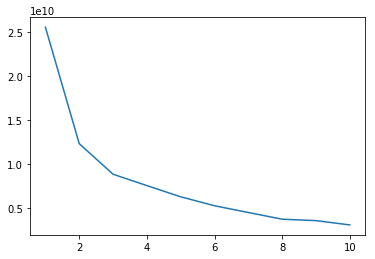

In [14]:
plt.plot(range(1,11), wcss)
plt.show()

The optimal number of cluster is the point that sudden drop

In [19]:
NumberOfClusters = 8 #Change to the point

In [20]:
kmeans = KMeans(n_clusters=NumberOfClusters, init='k-means++', max_iter=300, n_init=10).fit(TpmList)

In [21]:
GroupFile={index:[] for index in range(NumberOfClusters)}
for Name,Label in zip(NameList,kmeans.labels_):
    GroupFile[Label].append(Name)

In [22]:
[print(List) for List in GroupFile.values()]

['BC-2.exp', 'BC-3.exp', 'RUN-CA08.exp', 'RUN-CA16.exp', 'RUN-CA20.exp']
['RUN-CA22.exp']
['org-19.exp', 'org-42.exp', 'Org-50C.exp', 'Org-52C.exp', 'Org-52N.exp', 'Org-54C.exp', 'Org-59C.exp', 'Org-59N.exp', 'RUN-CA05.exp', 'RUN-CA25.exp']
['org-7.exp']
['BC-1.exp', 'Org-54N.exp']
['RUN-CA07.exp', 'RUN-CA17.exp', 'RUN-CA19.exp']
['RUN-CA23.exp']
['Org-42N.exp', 'Org-50N.exp']


[None, None, None, None, None, None, None, None]